# Análisis de los datos

In [12]:
import pandas as pd

df = pd.read_csv('datos_planta.csv')

          humidity       light  temperature                timestamp   state
count   757.000000  757.000000   757.000000                      757     757
unique         NaN         NaN          NaN                      757       3
top            NaN         NaN          NaN  2025-04-22 07:35:00.595  Normal
freq           NaN         NaN          NaN                        1     381
mean     54.624835   15.760898    21.622061                      NaN     NaN
std      12.229153   41.532287     3.781620                      NaN     NaN
min      32.000000  -16.000000    10.780000                      NaN     NaN
25%      42.000000  -15.000000    19.250000                      NaN     NaN
50%      59.000000   -5.000000    22.230000                      NaN     NaN
75%      64.000000   56.000000    23.850000                      NaN     NaN
max      82.000000  100.000000    31.360000                      NaN     NaN


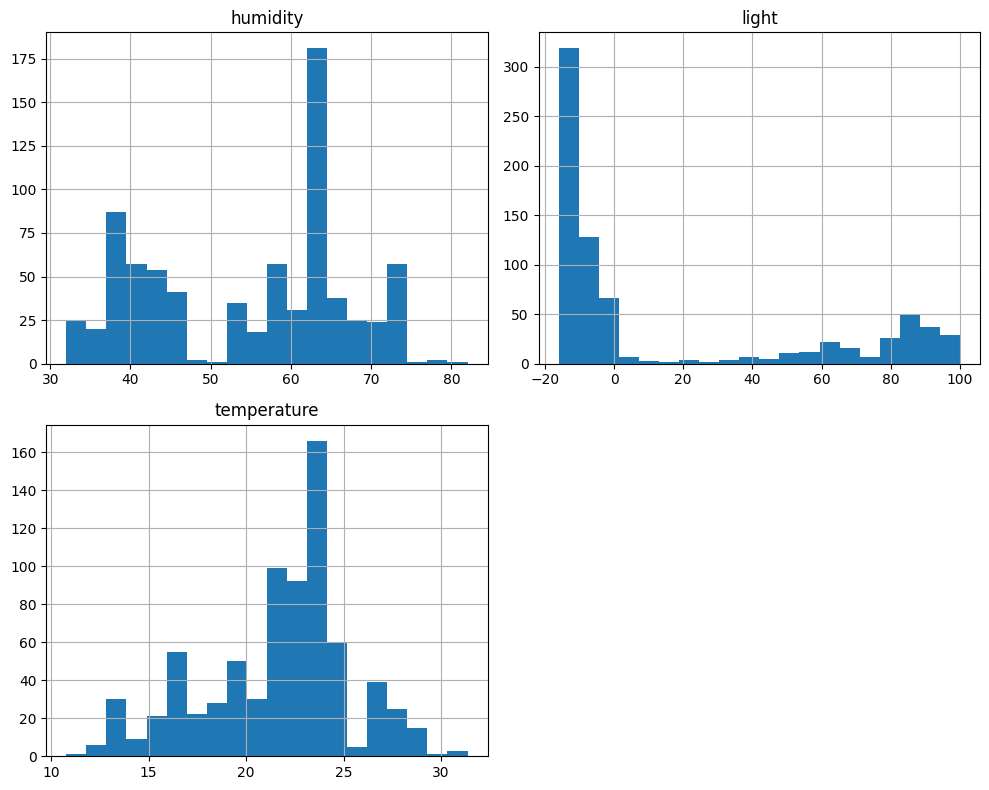

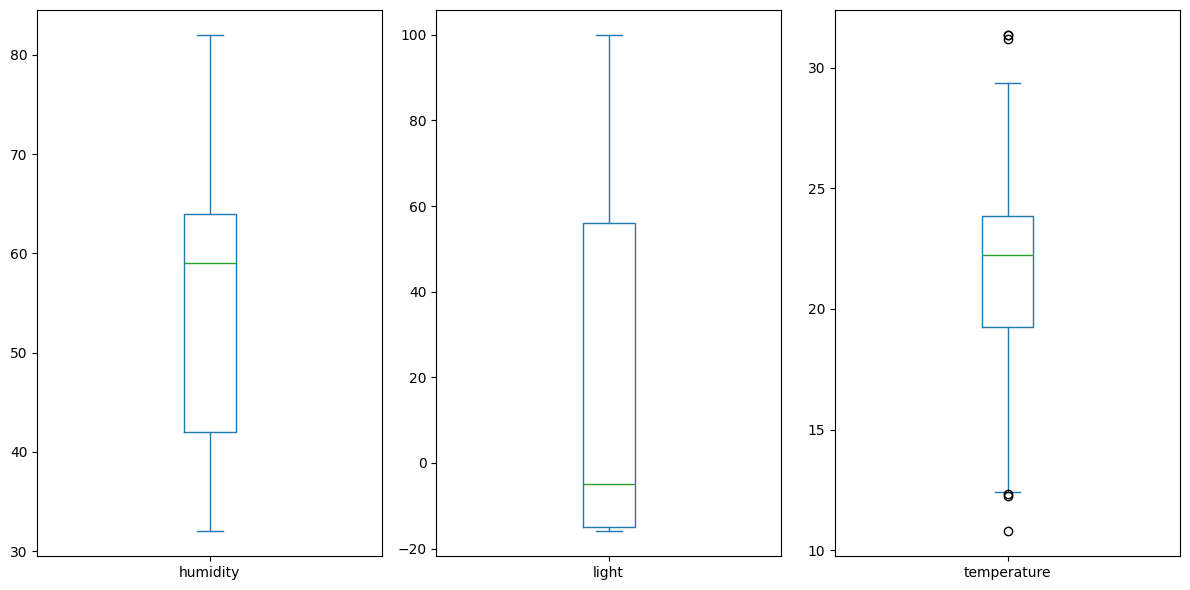

Valores faltantes por columna:
humidity       0
light          0
temperature    0
timestamp      0
state          0
dtype: int64


In [13]:
import matplotlib.pyplot as plt

# Estadísticas descriptivas
print(df.describe(include='all'))

# Histogramas para la distribución de cada variable numérica
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Boxplots para identificar valores atípicos
df[['humidity', 'light', 'temperature']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 6), sharey=False)
plt.tight_layout()
plt.show()

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

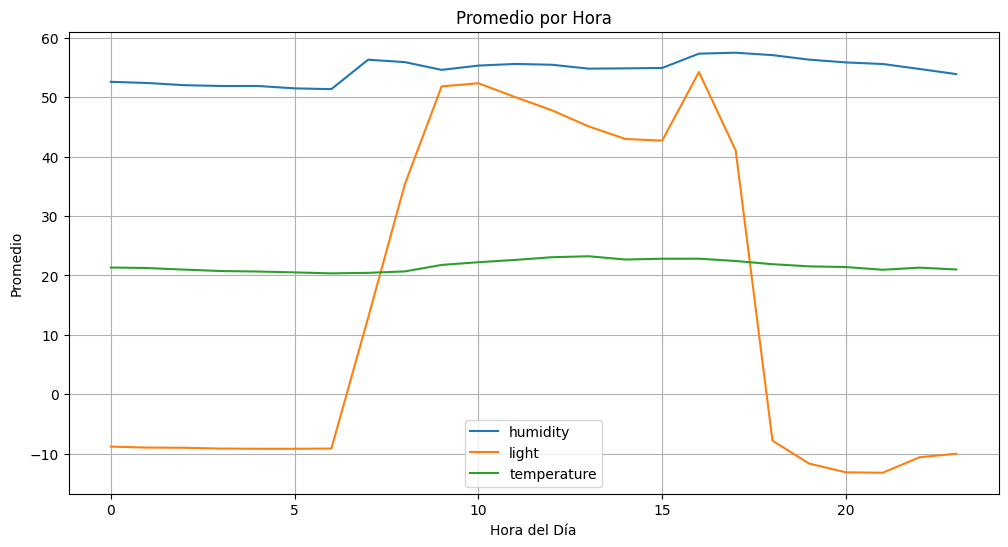

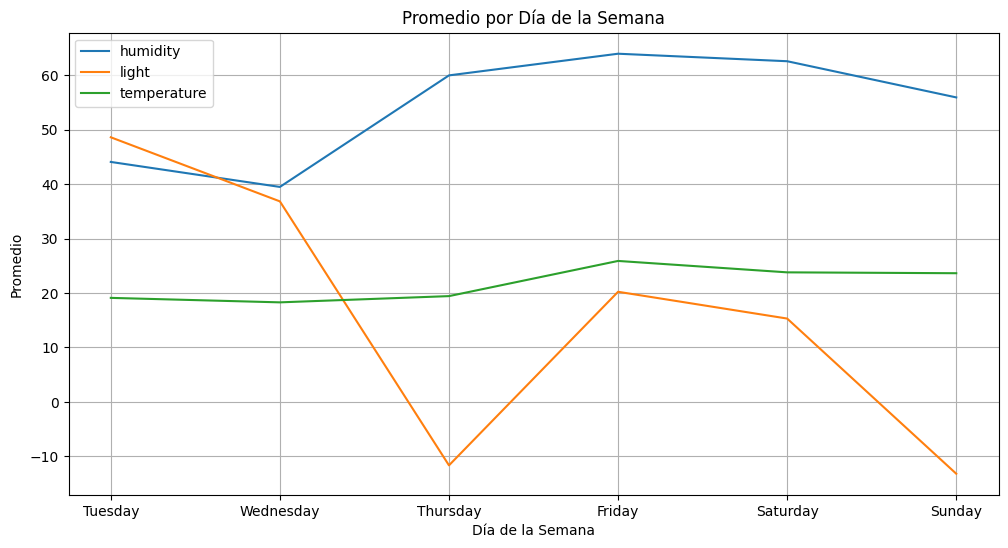

In [14]:

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

hourly_means = df.groupby('hour')[['humidity', 'light', 'temperature']].mean()
hourly_means.plot(figsize=(12, 6), title='Promedio por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio')
plt.grid()
plt.show()

weekly_means = df.groupby('day_of_week')[['humidity', 'light', 'temperature']].mean()
weekly_means = weekly_means.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Ordenar días
weekly_means.plot(figsize=(12, 6), title='Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio')
plt.grid()
plt.show()

Matriz de correlación de Pearson:
             humidity     light  temperature
humidity     1.000000 -0.288625     0.702947
light       -0.288625  1.000000     0.021233
temperature  0.702947  0.021233     1.000000

Matriz de correlación de Spearman:
             humidity     light  temperature
humidity     1.000000 -0.524402     0.563663
light       -0.524402  1.000000    -0.082414
temperature  0.563663 -0.082414     1.000000


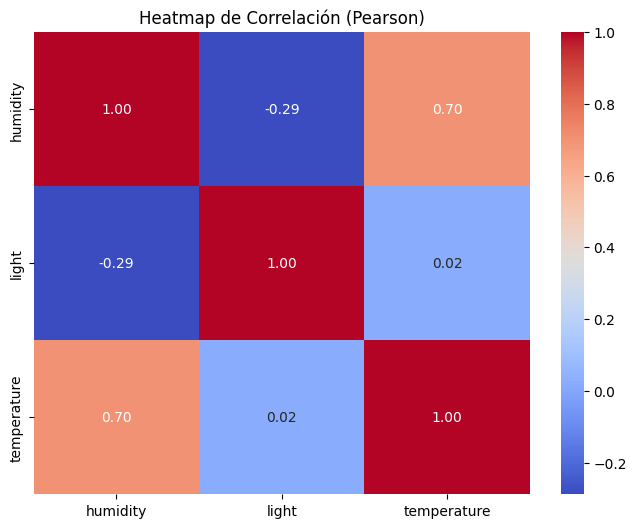

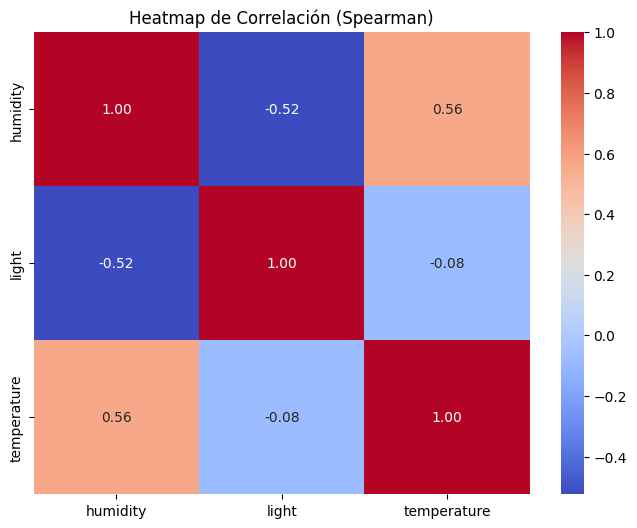

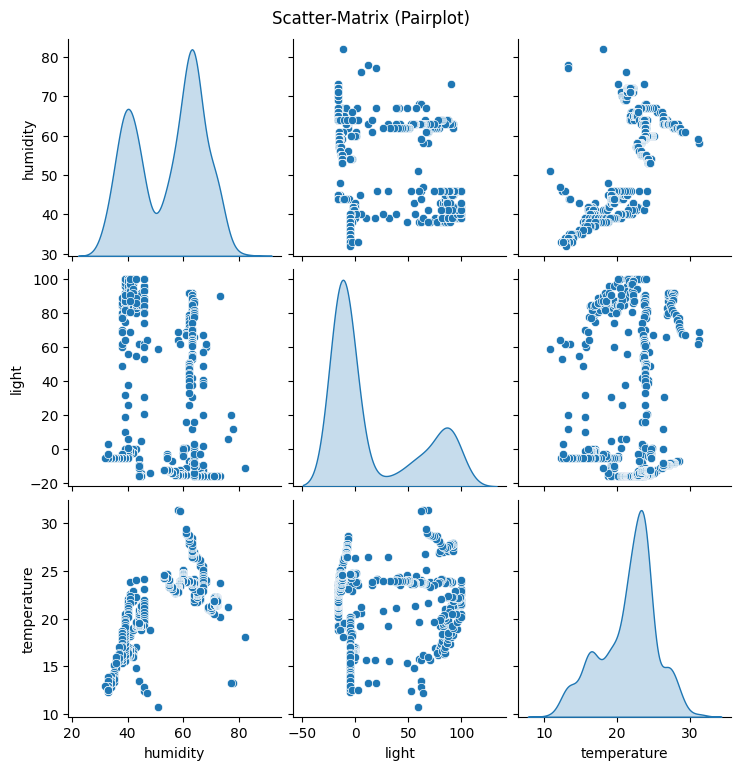

In [15]:
import seaborn as sns

# Matriz de correlación de Pearson
pearson_corr = df[['humidity', 'light', 'temperature']].corr(method='pearson')
print("Matriz de correlación de Pearson:")
print(pearson_corr)

# Matriz de correlación de Spearman
spearman_corr = df[['humidity', 'light', 'temperature']].corr(method='spearman')
print("\nMatriz de correlación de Spearman:")
print(spearman_corr)

# Heatmap de la matriz de correlación de Pearson
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación (Pearson)')
plt.show()

# Heatmap de la matriz de correlación de Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación (Spearman)')
plt.show()

# Scatter-matrix (pairplot) para visualizar relaciones entre variables
sns.pairplot(df[['humidity', 'light', 'temperature']], diag_kind='kde', kind='scatter')
plt.suptitle('Scatter-Matrix (Pairplot)', y=1.02)
plt.show()

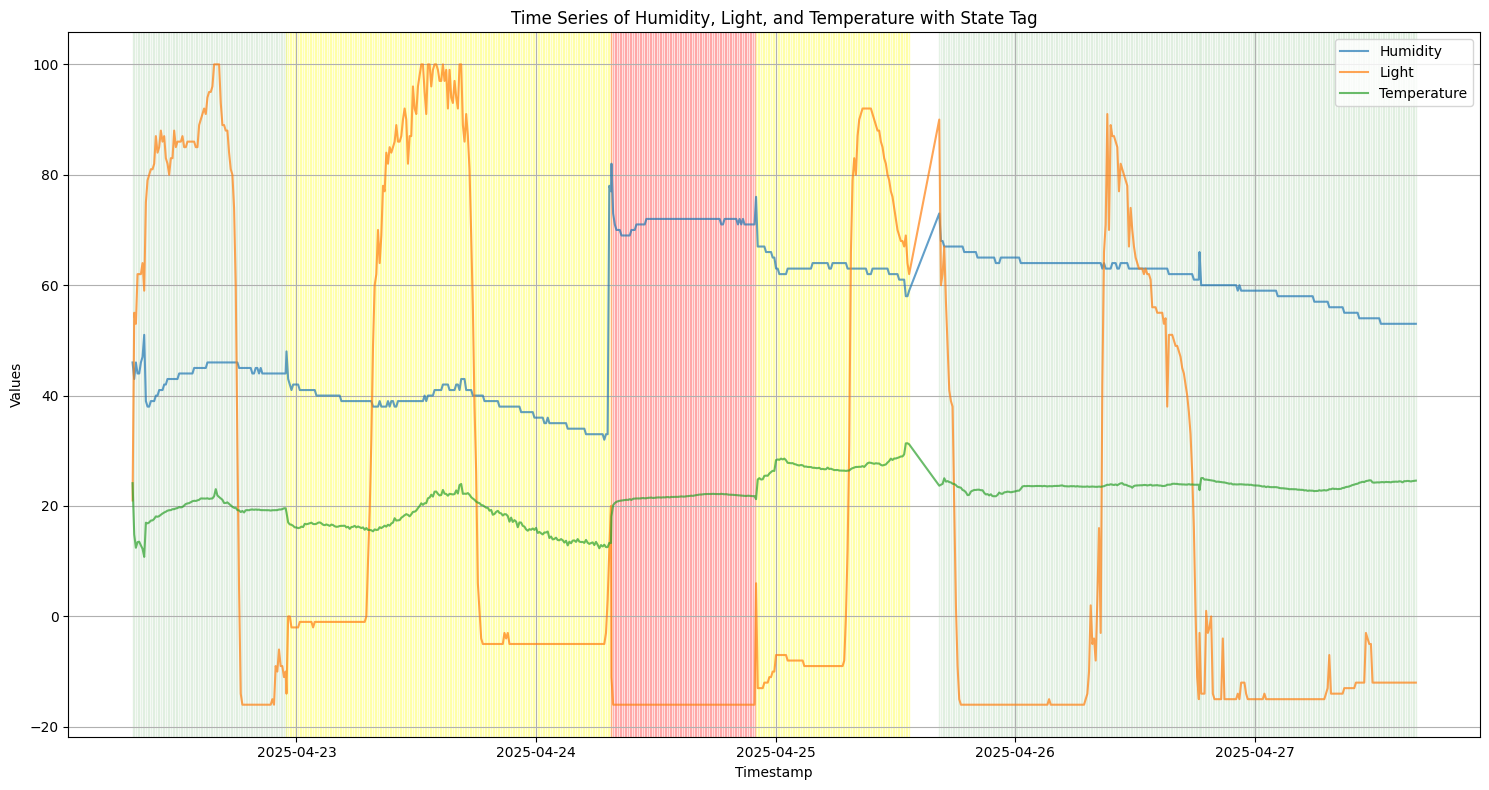

In [16]:
# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the time series
plt.figure(figsize=(15, 8))

# Plot each variable
plt.plot(df['timestamp'], df['humidity'], label='Humidity', alpha=0.7)
plt.plot(df['timestamp'], df['light'], label='Light', alpha=0.7)
plt.plot(df['timestamp'], df['temperature'], label='Temperature', alpha=0.7)

# Add background color based on state
for idx, row in df.iterrows():
    if row['state'] == 'Triste':
        plt.axvspan(row['timestamp'], row['timestamp'], color='yellow', alpha=0.3)
    elif row['state'] == 'Muy Triste':
        plt.axvspan(row['timestamp'], row['timestamp'], color='red', alpha=0.3)
    elif row['state'] == 'Normal':
        plt.axvspan(row['timestamp'], row['timestamp'], color='green', alpha=0.1)

# Add labels, legend, and grid
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series of Humidity, Light, and Temperature with State Tag')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Conclusiones

Identificamos tres períodos en el estado de la planta: "normalidad" (condiciones óptimas), "tristeza" (hojas ligeramente caídas) y "mucha tristeza" (hojas bastante caídas).

Los datos de estos pocos días muestran un ciclo diario de luz, con la excepción de un día en que permaneció a oscuras, y variaciones en la humedad del suelo y la temperatura. Los períodos de "tristeza" probablemente están relacionados con la sequía, seguidos por los de "mucha tristeza", que podrían ser causados por un encharcamiento tras el riego. Finalmente, los períodos de "normalidad" corresponden a cuando la humedad del suelo se ajustó adecuadamente.

Se observa un retraso entre cuando los sensores detectan condiciones adversas y cuando la planta muestra signos visibles de "tristeza". Esto indica que la planta puede aguantar condiciones no ideales durante un tiempo antes de que se note un cambio en su estado. Este retraso resalta la importancia de estar atentos a las condiciones del entorno con anticipación, para evitar que la planta llegue a un punto de estrés visible, ya que en ese momento el daño podría ser mayor.

Observación: detectamos valores negativos en la variable de luz en algunos momentos, lo que indica un problema con la configuración del umbral del sensor de luz en el código de la placa. 